# <h1 align="center">**Project 1 - Color Compression** </h1>

<h3 align="center"> Đặng Ngọc Tiến - 20127641</h3>

### Import library

In [263]:
## Import library
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### K-mean

In [264]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):    
    # Init in_pixels
    if init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0] , size = k_clusters , replace = False)]
    # Init random
    elif init_centroids == 'random':
        centroids = np.random.randint(0,255,size=(k_clusters,img_1d.shape[1]))
    else:
        raise ValueError('init_centroids must be "random" or "in_pixels"')

    for i in range(max_iter):
        # distance between each pixel and centroids
        distance = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)
        # Find the label of each pixel
        labels = np.argmin(distance , axis = 0)
        # Update centroids
        means = []
        for j in range(k_clusters):
            means.append(img_1d[labels == j].mean(axis = 0))
        means = np.array(means)
        for i in range(k_clusters):
          if len(means[i]) != 0:
            centroids[i] = means[i]
    
    return centroids, labels

### Image processing

In [265]:
## Read file and display
def readImg(name_img):
    raw_img = Image.open(name_img)
    plt.imshow(raw_img)
    return raw_img
    

def reshape_img(raw_img):
    img = np.array(raw_img)
    img_height, img_width = img.shape[0], img.shape[1]
    img = img.reshape( img_height*img_width, img.shape[2])
    return img, img_height, img_width

### Test program with `k = {3, 5, 7}`.

In [266]:
def showInImg(raw_img):  
    output_img = []
    output_img.append(raw_img)

    for k_cluster in [3,5,7]:
        ## Init in pixels test
        test_img, img_height, img_width = reshape_img(raw_img)
        centroids, labels = kmeans(test_img,k_cluster, 10,'in_pixels')
        
        ## reassign label to the picture
        for k in range(centroids.shape[0]):
            test_img[labels == k] = centroids[k]
            
        test_img = test_img.astype("uint8")
        test_img = test_img.reshape(img_height, img_width , 3)
        output_img.append(test_img.copy())
   
    plot_iter = 1
    demo, axis = plt.subplots(1, 3, figsize = (12, 8))
    
    for i,k in [(0,3),(1,5),(2,7)]:
        axis[i].set_title(f'Pixels random in img | K = {k}')
        axis[i].imshow(output_img[plot_iter])
        plot_iter += 1
    plt.tight_layout();

In [267]:
def showRandom(raw_img):  
    output_img = []
    output_img.append(raw_img)

    for k_cluster in [3,5,7]:
        ## Init in pixels test
        test_img, img_height, img_width = reshape_img(raw_img)
        centroids, labels = kmeans(test_img,k_cluster, 10,'random')
        
        ## reassign label to the picture
        for k in range(centroids.shape[0]):
            test_img[labels == k] = centroids[k]
            
        test_img = test_img.astype("uint8")
        test_img = test_img.reshape(img_height, img_width , 3)
        output_img.append(test_img.copy())
   
    plot_iter = 1
    demo, axis = plt.subplots(1, 3, figsize = (12, 8))
    
    for i,k in [(0,3),(1,5),(2,7)]:
        axis[i].set_title(f'Pixels random from [0,255] | K = {k}')
        axis[i].imshow(output_img[plot_iter])
        plot_iter += 1
    plt.tight_layout();

### Main Function

In [268]:
def main():
    print("Enter image name: ")
    name_img = input()
    raw_img = readImg(name_img)
    
    showInImg(raw_img)
    showRandom(raw_img)

Enter image name: 


C:\Users\Admin\AppData\Local\Temp\ipykernel_9792\3865939636.py:19: RuntimeWarning: Mean of empty slice.
  means.append(img_1d[labels == j].mean(axis = 0))


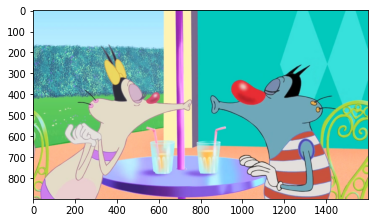

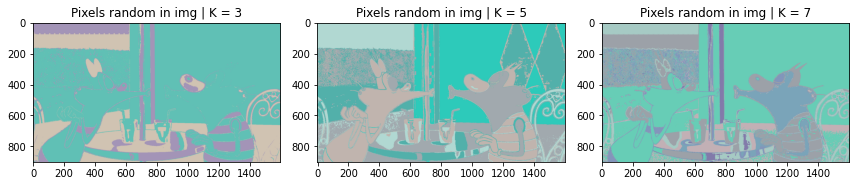

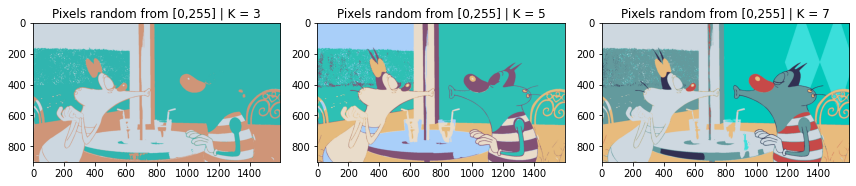

In [269]:
main()